# e-commerce profit and sales analysis


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as colors

In [3]:
df=pd.read_csv("Sample - Superstore.csv",encoding='Latin1')
#print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

# KPI overview

In [33]:
total_sales=df['Sales'].sum()
print(f"Total sales over the year are : {total_sales}")

total_profit = df['Profit'].sum()
print(f"Total profit over the year is : {total_profit}")

profit_margin = (total_profit / total_sales) * 100
print(f"Total profit margin over the year is : {profit_margin}")


Total sales over the year are : 2297200.8603
Total profit over the year is : 286397.0217
Total profit margin over the year is : 12.467217240315605


# These KPIs show overall business performance across the year 
~ Total sale indicates overall revenue generation while profit shows actual earning

# Converting Order Date column data type from object to datetime

In [8]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Order month']=df['Order Date'].dt.month
df['Order year']=df['Order Date'].dt.year
df['Order week']=df['Order Date'].dt.dayofweek
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Monthly sales analysis

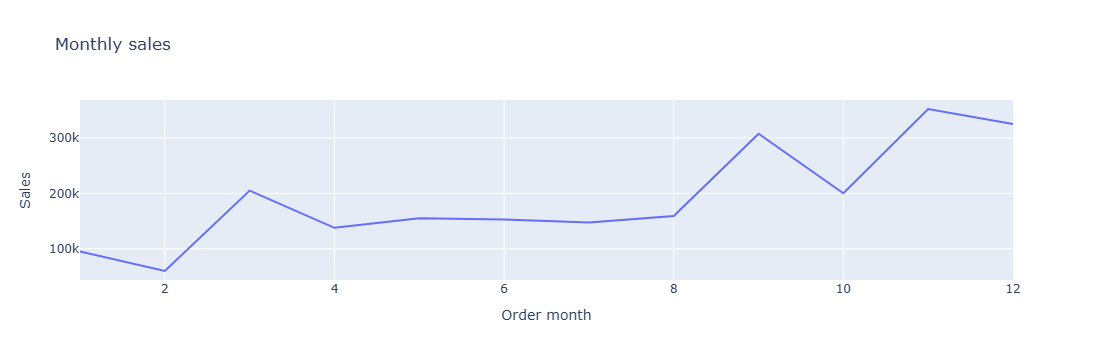

In [9]:
monthly_sales=df.groupby('Order month')['Sales'].sum().reset_index()
fig=px.line(monthly_sales,
            x='Order month',
            y='Sales',
            title='Monthly sales')
fig.show()

# November had the highest sales
# January had the lowest sales

# Sales by category

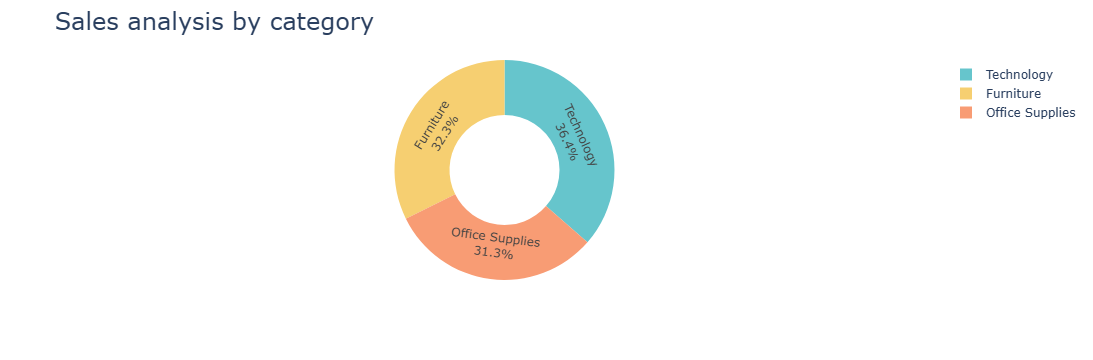

In [16]:
sales_by_category=df.groupby('Category')['Sales'].sum().reset_index()
fig=px.pie(sales_by_category,
           names='Category',
           values='Sales',
           hole=0.5,
           color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Sales analysis by category',title_font=dict(size=24))

# Technology items are  most sold over the year

# Sales by sub-category

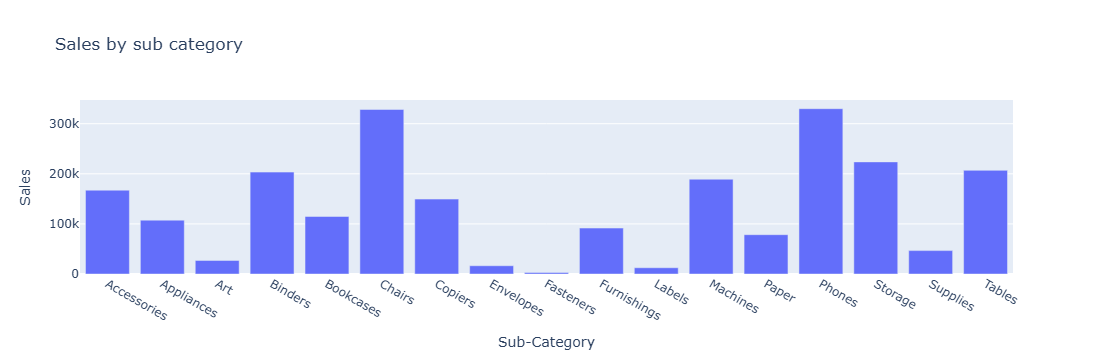

In [17]:
sales_by_sub_category=df.groupby('Sub-Category')['Sales'].sum().reset_index()
fig=px.bar(sales_by_sub_category,
           x='Sub-Category',
           y='Sales',
           title='Sales by sub category')
fig.show()

# Chairs are the most sold item

# Monthly profit


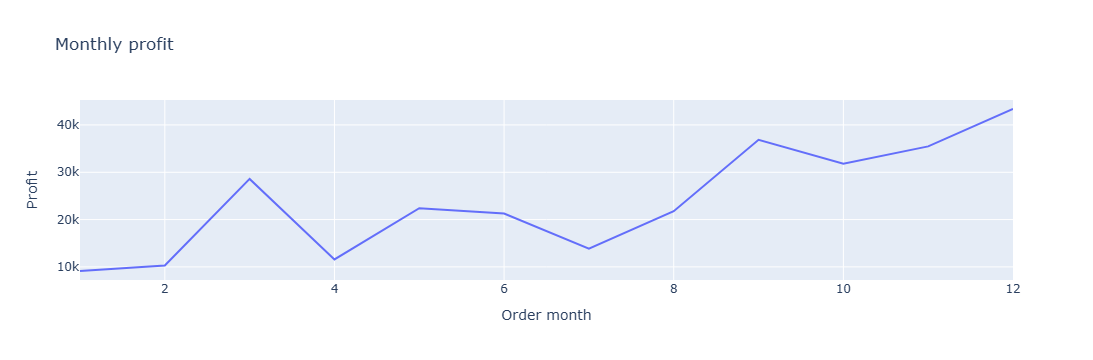

In [21]:
monthly_sales=df.groupby('Order month')['Profit'].sum().reset_index()
fig=px.line(monthly_sales,
            x='Order month',
            y='Profit',
            title='Monthly profit')
fig.show()
            

# Profit analysis by category

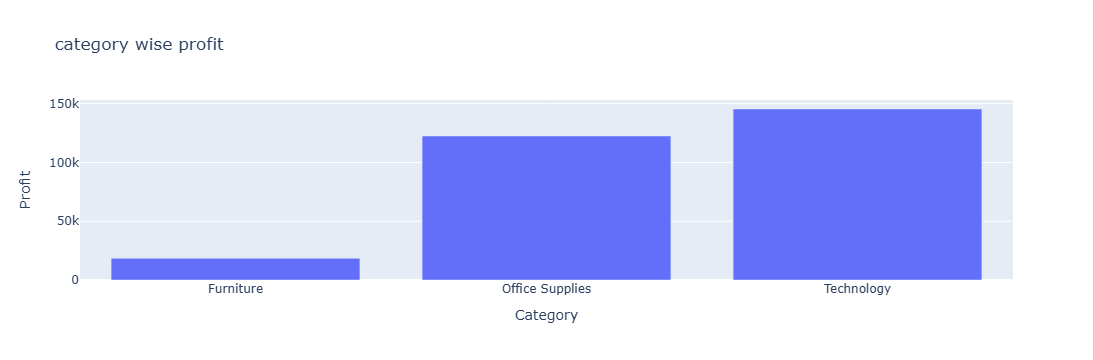

In [22]:
profit_by_category=df.groupby('Category')['Profit'].sum().reset_index()
fig=px.bar(profit_by_category,
           x='Category',
           y='Profit',
           title='category wise profit')
fig.show()

# Profit analysis by sub-category

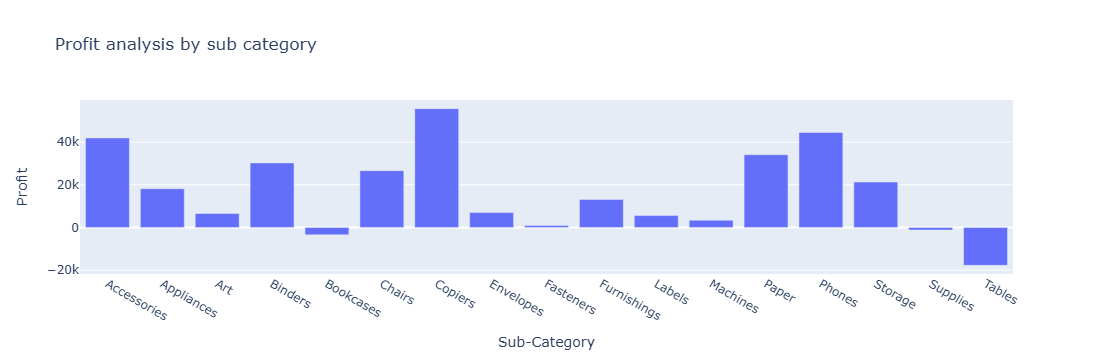

In [24]:
profit_sub_category=df.groupby("Sub-Category")["Profit"].sum().reset_index()
fig=px.bar(profit_sub_category,x='Sub-Category',y='Profit',title='Profit analysis by sub category')
fig.show()


# copiers were most sold sub-category item